<a href="https://colab.research.google.com/github/sriharimohan/Premier-League-Match-Prediction-using-ML-Models/blob/main/Project_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
df=pd.read_csv('/content/England.csv')

In [13]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12153 entries, 0 to 12152
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HomeTeam        12153 non-null  object 
 1   AwayTeam        12153 non-null  object 
 2   FTH Goals       12153 non-null  int64  
 3   FTA Goals       12153 non-null  int64  
 4   FT Result       12153 non-null  object 
 5   HTH Goals       11229 non-null  float64
 6   HTA Goals       11229 non-null  float64
 7   HT Result       11229 non-null  object 
 8   Referee         9329 non-null   object 
 9   H Shots         9329 non-null   float64
 10  A Shots         9329 non-null   float64
 11  H SOT           9329 non-null   float64
 12  A SOT           9329 non-null   float64
 13  H Fouls         9329 non-null   float64
 14  A Fouls         9329 non-null   float64
 15  H Corners       9329 non-null   float64
 16  A Corners       9329 non-null   float64
 17  H Yellow        9329 non-null  

,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,Referee,H Shots,...,A Corners,H Yellow,A Yellow,H Red,A Red,Display_Order,League,GoalDiff,ShotDifference,Result
0,Ipswich Town,Brighton & Hove Albion,0,2,A,0.0,1.0,A,T Harrington,5.0,...,9.0,2.0,2.0,0.0,0.0,20250116,Premier League,-2,-2.0,-1
1,Man United,Southampton,3,1,H,0.0,1.0,A,J Brooks,23.0,...,4.0,1.0,3.0,0.0,0.0,20250116,Premier League,2,4.0,1
2,Everton,Aston Villa,0,1,A,0.0,0.0,D,S Barrott,10.0,...,5.0,2.0,1.0,0.0,0.0,20250115,Premier League,-1,0.0,-1
3,Leicester,Crystal Palace,0,2,A,0.0,0.0,D,A Madley,21.0,...,3.0,0.0,0.0,0.0,0.0,20250115,Premier League,-2,0.0,-1
4,Newcastle,Wolves,3,0,H,1.0,0.0,H,D England,17.0,...,2.0,0.0,2.0,0.0,0.0,20250115,Premier League,3,-2.0,1


In [14]:
required_columns = [
    'FT Result', 'H Shots', 'A Shots', 'H SOT', 'A SOT',
    'H Fouls', 'A Fouls', 'H Corners', 'A Corners',
    'H Yellow', 'A Yellow', 'H Red', 'A Red'
]

In [15]:
df_cleaned = df.dropna(subset=required_columns)

In [18]:
df_cleaned['Result'] = df_cleaned['FT Result'].map({'H': 1, 'D': 0, 'A': -1})

/tmp/ipython-input-1630971034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Result'] = df_cleaned['FT Result'].map({'H': 1, 'D': 0, 'A': -1})


In [21]:
df_cleaned['ShotsOnTargetDiff'] = df_cleaned['H SOT'] - df_cleaned['A SOT']
df_cleaned['ShotsDiff'] = df_cleaned['H Shots'] - df_cleaned['A Shots']
df_cleaned['FoulsDiff'] = df_cleaned['H Fouls'] - df_cleaned['A Fouls']
df_cleaned['CornersDiff'] = df_cleaned['H Corners'] - df_cleaned['A Corners']
df_cleaned['YellowDiff'] = df_cleaned['H Yellow'] - df_cleaned['A Yellow']
df_cleaned['RedDiff'] = df_cleaned['H Red'] - df_cleaned['A Red']

/tmp/ipython-input-338717184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['ShotsOnTargetDiff'] = df_cleaned['H SOT'] - df_cleaned['A SOT']
/tmp/ipython-input-338717184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['ShotsDiff'] = df_cleaned['H Shots'] - df_cleaned['A Shots']
/tmp/ipython-input-338717184.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

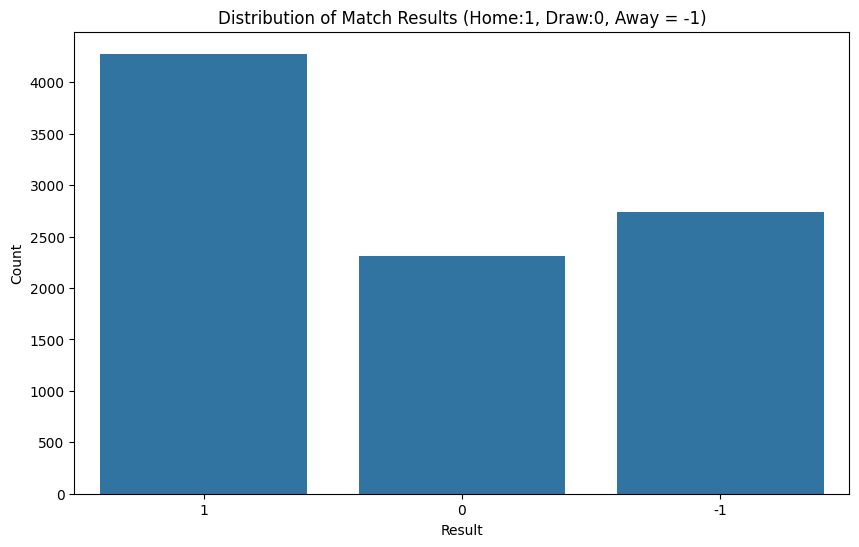

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Result', data=df_cleaned, order=[1, 0, -1])
plt.title('Distribution of Match Results (Home:1, Draw:0, Away = -1)')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = ['ShotsOnTargetDiff', 'ShotsDiff', 'FoulsDiff', 'CornersDiff', 'YellowDiff', 'RedDiff']
X = df_cleaned[features]
y = df_cleaned['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Scaler = StandardScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)